In [74]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
from matplotlib import colors as mcolors
from sklearn.decomposition import PCA

In [147]:
FILEPATH = './Major_Crime_Indicators_Open_Data_-3805566126367379926.csv'
data = pd.read_csv(FILEPATH, index_col=0)
df = data.copy()

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df.head(10)

,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOY,OCC_DOW,OCC_HOUR,DIVISION,LOCATION_TYPE,PREMISES_TYPE,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,x,y
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,GO-20141261013,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,4,2014.0,January,1.0,1.0,Wednesday,4,D31,"Apartment (Rooming House, Condo)",Apartment,1430,100,Assault,Assault,155,Downsview (155),026,Downsview-Roding-CFB (26),-79.483869,43.734369,-8.848104e+06,5.424427e+06
2,GO-20141261561,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,8,2014.0,January,1.0,1.0,Wednesday,8,D31,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",Commercial,1420,100,Assault With Weapon,Assault,154,Oakdale-Beverley Heights (154),026,Downsview-Roding-CFB (26),-79.513772,43.719813,-8.851433e+06,5.422185e+06
3,GO-20141262377,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,12,2014.0,January,1.0,1.0,Wednesday,12,D55,"Single Home, House (Attach Garage, Cottage, Mo...",House,1420,110,Assault Bodily Harm,Assault,068,North Riverdale (68),068,North Riverdale (68),-79.357562,43.674791,-8.834043e+06,5.415253e+06
4,GO-20141262553,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,14,2014.0,January,1.0,1.0,Wednesday,13,D13,Retirement Home,Other,1430,100,Assault,Assault,094,Wychwood (94),094,Wychwood (94),-79.422371,43.673842,-8.841258e+06,5.415106e+06
5,GO-20141263115,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,16,2014.0,January,1.0,1.0,Wednesday,11,D41,"Apartment (Rooming House, Condo)",Apartment,1430,100,Assault,Assault,120,Clairlea-Birchmount (120),120,Clairlea-Birchmount (120),-79.286725,43.700100,-8.826158e+06,5.419149e+06
6,GO-20141263744,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,18,2014.0,January,1.0,1.0,Wednesday,18,D54,"Apartment (Rooming House, Condo)",Apartment,1420,100,Assault With Weapon,Assault,061,Taylor-Massey (61),061,Taylor-Massey (61),-79.300618,43.694414,-8.827704e+06,5.418273e+06
7,GO-20141260912,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,6,2014.0,January,1.0,1.0,Wednesday,4,D14,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,1610,100,Robbery With Weapon,Robbery,078,Kensington-Chinatown (78),078,Kensington-Chinatown (78),-79.401983,43.647598,-8.838988e+06,5.411068e+06
8,GO-20141264272,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,21,2014.0,January,1.0,1.0,Wednesday,21,D14,"Apartment (Rooming House, Condo)",Apartment,1420,100,Assault With Weapon,Assault,085,South Parkdale (85),085,South Parkdale (85),-79.420532,43.638306,-8.841053e+06,5.409639e+06
9,GO-20141264140,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,20,2014.0,January,1.0,1.0,Wednesday,20,D53,"Single Home, House (Attach Garage, Cottage, Mo...",House,1430,100,Assault,Assault,100,Yonge-Eglinton (100),100,Yonge-Eglinton (100),-79.400083,43.705466,-8.838777e+06,5.419975e+06


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 452949 entries, 1 to 452949
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   EVENT_UNIQUE_ID    452949 non-null  object 
 1   REPORT_DATE        452949 non-null  object 
 2   OCC_DATE           452949 non-null  object 
 3   REPORT_YEAR        452949 non-null  int64  
 4   REPORT_MONTH       452949 non-null  object 
 5   REPORT_DAY         452949 non-null  int64  
 6   REPORT_DOY         452949 non-null  int64  
 7   REPORT_DOW         452949 non-null  object 
 8   REPORT_HOUR        452949 non-null  int64  
 9   OCC_YEAR           452798 non-null  float64
 10  OCC_MONTH          452798 non-null  object 
 11  OCC_DAY            452798 non-null  float64
 12  OCC_DOY            452798 non-null  float64
 13  OCC_DOW            452798 non-null  object 
 14  OCC_HOUR           452949 non-null  int64  
 15  DIVISION           452949 non-null  object 
 16  LOCATIO

In [77]:
# count null value of all columns
df.isnull().sum()

EVENT_UNIQUE_ID        0
REPORT_DATE            0
OCC_DATE               0
REPORT_YEAR            0
REPORT_MONTH           0
REPORT_DAY             0
REPORT_DOY             0
REPORT_DOW             0
REPORT_HOUR            0
OCC_YEAR             151
OCC_MONTH            151
OCC_DAY              151
OCC_DOY              151
OCC_DOW              151
OCC_HOUR               0
DIVISION               0
LOCATION_TYPE          0
PREMISES_TYPE          0
UCR_CODE               0
UCR_EXT                0
OFFENCE                0
MCI_CATEGORY           0
HOOD_158               0
NEIGHBOURHOOD_158      0
HOOD_140               0
NEIGHBOURHOOD_140      0
LONG_WGS84             0
LAT_WGS84              0
x                      0
y                      0
dtype: int64

In [78]:
# remove null values of data
df = df.dropna()
df.isnull().sum()

EVENT_UNIQUE_ID      0
REPORT_DATE          0
OCC_DATE             0
REPORT_YEAR          0
REPORT_MONTH         0
REPORT_DAY           0
REPORT_DOY           0
REPORT_DOW           0
REPORT_HOUR          0
OCC_YEAR             0
OCC_MONTH            0
OCC_DAY              0
OCC_DOY              0
OCC_DOW              0
OCC_HOUR             0
DIVISION             0
LOCATION_TYPE        0
PREMISES_TYPE        0
UCR_CODE             0
UCR_EXT              0
OFFENCE              0
MCI_CATEGORY         0
HOOD_158             0
NEIGHBOURHOOD_158    0
HOOD_140             0
NEIGHBOURHOOD_140    0
LONG_WGS84           0
LAT_WGS84            0
x                    0
y                    0
dtype: int64

In [79]:
dropped_columns = ['HOOD_140', 'NEIGHBOURHOOD_140', 'x', 'y']
df = df[df['NEIGHBOURHOOD_158'] != 'NSA']
df.drop(dropped_columns, axis=1, inplace=True)

In [80]:
long_min, long_max = df['LONG_WGS84'].min(), df['LONG_WGS84'].max()
lat_min, lat_max = df['LAT_WGS84'].min(), df['LAT_WGS84'].max()

print(f"Longitude range: {long_min} to {long_max}")
print(f"Latitude range: {lat_min} to {lat_max}")

Longitude range: -79.6392473469942 to -79.1220439585855
Latitude range: 43.5864869503928 to 43.8531638931327


In [81]:
year_max, year_min = df['REPORT_YEAR'].max(), df['REPORT_YEAR'].min()
print(f"Original year range: {year_min} to {year_max}")
# Crime trend from 2014 - 2024
df_filtered = df[df['REPORT_YEAR'] != 2025]

Original year range: 2014 to 2025


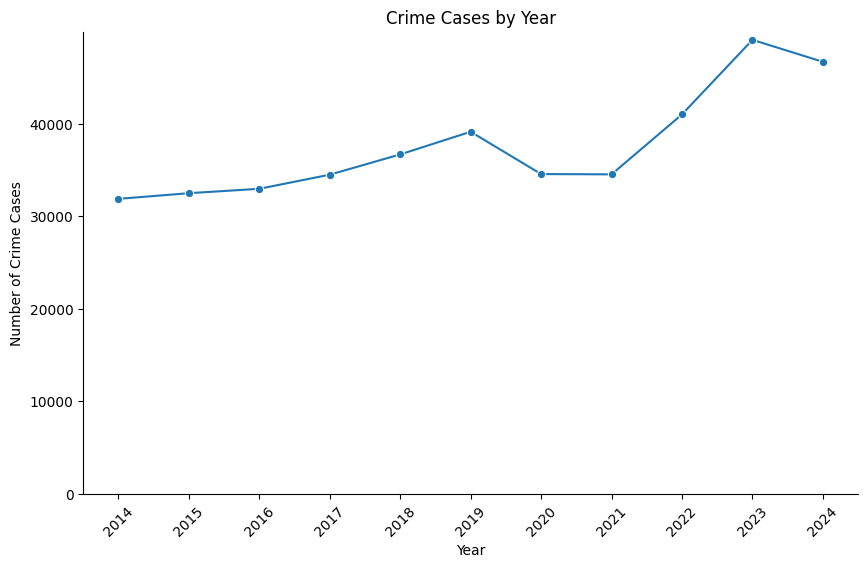

In [82]:
yearly_cases = df_filtered.groupby(['REPORT_YEAR']).size().reset_index(name='Yearly_Case_Count')
plt.figure(figsize=(10, 6))
sns.lineplot(x='REPORT_YEAR', y='Yearly_Case_Count', data=yearly_cases,marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Crime Cases')
plt.title('Crime Cases by Year')
plt.xticks(ticks=yearly_cases['REPORT_YEAR'], rotation=45)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylim(0)
plt.show()

Key findings: The crime trend from 2014 to 2024 shows a steady increase in incidents until a peak in 2019, followed by a sharp decline in 2020 and 2021, likely due to the pandemic. Since then crime cases have continued to increase, with a notable surge in 2023.

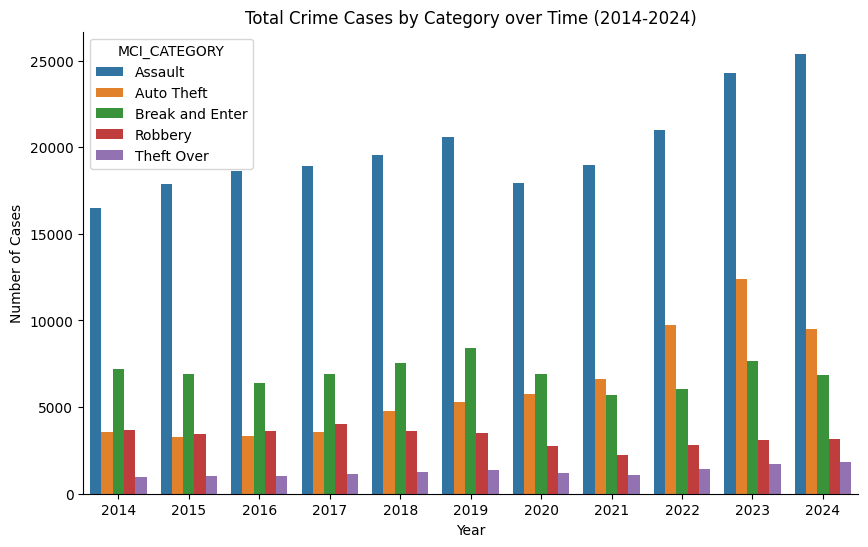

In [83]:
yearly_cases_category = df_filtered.groupby(['REPORT_YEAR','MCI_CATEGORY']).size().reset_index(name='Case_Count')
plt.figure(figsize=(10, 6))
sns.barplot(x='REPORT_YEAR', y='Case_Count', hue='MCI_CATEGORY', data=yearly_cases_category)
plt.title("Total Crime Cases by Category over Time (2014-2024)")
plt.xlabel('Year')
plt.ylabel('Number of Cases')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

**Key Findings:** The plot reveals that Assault consistently has the highest number of cases from 2014 to 2024, with a sharp increase in 2023. Auto Theft shows notable increase, while Robbery and Theft Over remain relatively stable but lower in frequency.

In [84]:
# Crime trend from 2021 - 2024
df_recent = df[df['REPORT_YEAR'].isin([2021, 2022, 2023, 2024])]

**Key findings:** The distribution of crime cases over days of the week show no significant trends, remaining relatively equal throughout.

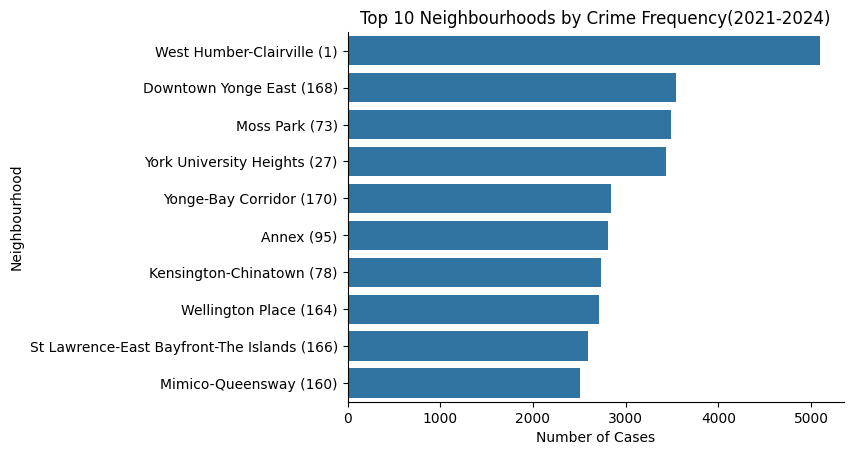

In [89]:
NEIGHBOURHOOD_crime = df_recent.groupby(['NEIGHBOURHOOD_158']).size().reset_index(name='Case_Count')
NEIGHBOURHOOD_crime = NEIGHBOURHOOD_crime.sort_values(by='Case_Count', ascending=False)
NEIGHBOURHOOD_crime.head(10)

sns.barplot(x='Case_Count', y='NEIGHBOURHOOD_158', data=NEIGHBOURHOOD_crime.head(10))
plt.title('Top 10 Neighbourhoods by Crime Frequency(2021-2024)')
plt.xlabel('Number of Cases')
plt.ylabel('Neighbourhood')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [ ]:
# Create a base map centered around Toronto
map_center = [43.7, -79.4]  # Rough center of Toronto
crime_map = folium.Map(location=map_center, zoom_start=11)

# Extract the coordinates from the dataframe as a list of lists
heat_data = df_recent[['LAT_WGS84', 'LONG_WGS84']].dropna().values.tolist()

# Add the heatmap to the map
HeatMap(heat_data, radius=10).add_to(crime_map)

# Save the map
crime_map.save('crime_heatmap.html')

In [91]:
coordinates = df_recent[['LAT_WGS84', 'LONG_WGS84']].values

# Standardize the data
scaler = StandardScaler()
coordinates_scaled = scaler.fit_transform(coordinates)

In [134]:
df_recent_copy = df_recent.copy()
# Convert the report_date to a datetime object if it isn't already
df_recent_copy['REPORT_DATE'] = pd.to_datetime(df_recent_copy['REPORT_DATE'])
df_recent_copy['REPORT_DATETIME'] = df_recent_copy['REPORT_DATE'] + pd.to_timedelta(df_recent_copy['REPORT_HOUR']-5, unit='h')

df_recent_copy['OCC_DATE'] = pd.to_datetime(df_recent_copy['OCC_DATE'])
df_recent_copy['OCC_DATETIME'] = df_recent_copy['OCC_DATE'] + pd.to_timedelta(df_recent_copy['OCC_HOUR']-5, unit='h')

df_recent_copy['report_time'] = (
         df_recent_copy['REPORT_DATETIME'] - df_recent_copy['OCC_DATETIME']
     )

In [163]:
#Median reporting time
print(df_recent_copy['report_time'].median())

#Median reporting time by crime type
print(df_recent_copy.groupby('MCI_CATEGORY')['report_time'].agg(['median','size']).sort_values(by='median', ascending=False))

#Median reporting time by neighborhood
print(df_recent_copy.groupby('NEIGHBOURHOOD_158')['report_time'].agg(['median','size']).sort_values(by='median', ascending=False))


0 days 02:00:00
                         median   size
MCI_CATEGORY                          
Theft Over      1 days 15:00:00   6058
Auto Theft      0 days 09:00:00  38261
Break and Enter 0 days 05:00:00  26170
Assault         0 days 00:00:00  89646
Robbery         0 days 00:00:00  11295
                                                     median  size
NEIGHBOURHOOD_158                                                
Leaside-Bennington (56)                     0 days 08:00:00   700
Lawrence Park South (103)                   0 days 08:00:00   699
Etobicoke West Mall (13)                    0 days 07:00:00   464
Maple Leaf (29)                             0 days 07:00:00   424
Eringate-Centennial-West Deane (11)         0 days 07:00:00   795
West Humber-Clairville (1)                  0 days 07:00:00  5094
Humewood-Cedarvale (106)                    0 days 06:30:00   512
Mount Pleasant East (99)                    0 days 06:30:00   612
Princess-Rosethorn (10)                     0 days 

In [185]:
#Categorize report delay for classification analysis
def categorize_delay(hours):
    if hours <= 1:
        return 'immediate'
    elif hours <= 24:  # Within 1 day
        return 'same_day'
    elif hours <= 168:  # Within 1 week
        return 'within_week'
    else:
        return 'long_delay'

df_recent_copy['Report_time_hours'] = df_recent_copy['report_time'].dt.total_seconds() / 3600
df_recent_copy['Report_time_category'] = df_recent_copy['Report_time_hours'].apply(categorize_delay)


print("Delay Category Distribution:")
print(df_recent_copy['Report_time_category'].value_counts())
print("\nDelay Category by Crime Type:")
print(pd.crosstab(df_recent_copy['MCI_CATEGORY'], df_recent_copy['Report_time_category']))
print("\nDelay Category by neighborhood:")
print(pd.crosstab(df_recent_copy['NEIGHBOURHOOD_158'], df_recent_copy['Report_time_category']))

Delay Category Distribution:
Report_time_category
immediate      83955
same_day       52108
within_week    18097
long_delay     17270
Name: count, dtype: int64

Delay Category by Crime Type:
Report_time_category  immediate  long_delay  same_day  within_week
MCI_CATEGORY                                                      
Assault                   57253       10858     13996         7539
Auto Theft                 7021        2147     25342         3751
Break and Enter           10031        2306      9298         4535
Robbery                    8641         330      1807          517
Theft Over                 1009        1629      1665         1755

Delay Category by neighborhood:
Report_time_category                         immediate  long_delay  same_day  \
NEIGHBOURHOOD_158                                                              
Agincourt North (129)                              356          52       394   
Agincourt South-Malvern West (128)                 663         134 

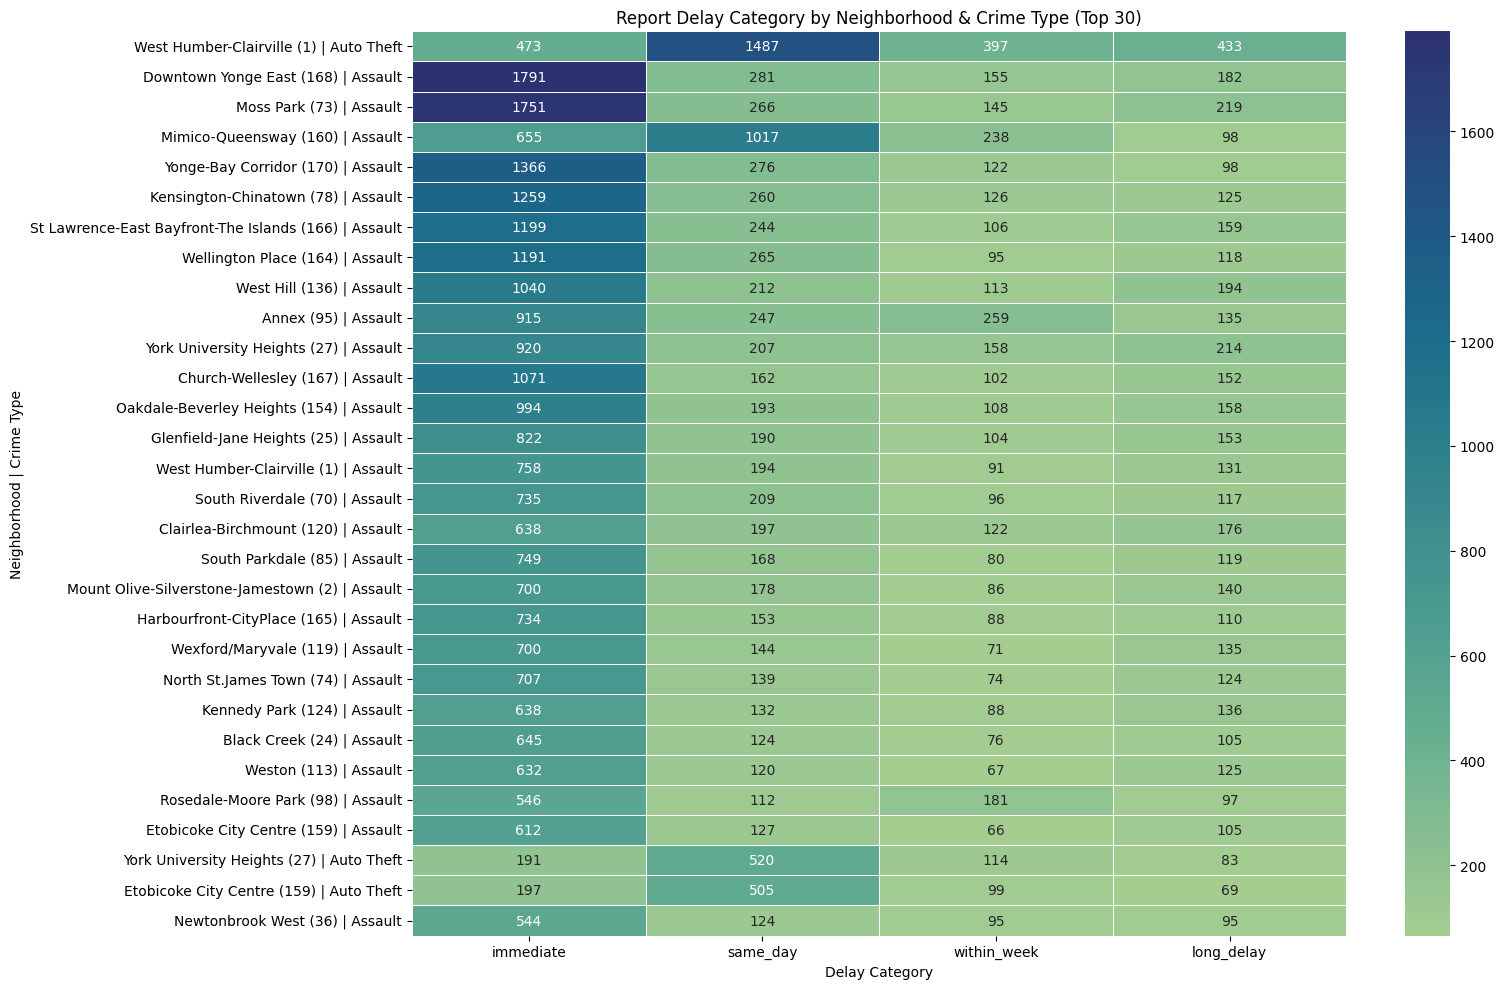

In [196]:
# Create full pivot table: Neighborhood | Crime Type vs. Delay Category
df_recent_copy['Neighborhood_CrimeType'] = df_recent_copy['NEIGHBOURHOOD_158'] + ' | ' + df_recent_copy['MCI_CATEGORY']
pivot_combo_all = pd.crosstab(df_recent_copy['Neighborhood_CrimeType'], df_recent_copy['Report_time_category'])

# Make sure delay categories are in order
delay_order = ['immediate', 'same_day', 'within_week', 'long_delay']
pivot_combo_all = pivot_combo_all.reindex(columns=delay_order, fill_value=0)

# Select top 30 combinations by total count
top_combos = pivot_combo_all.sum(axis=1).sort_values(ascending=False).head(30).index
pivot_combo_top = pivot_combo_all.loc[top_combos]

plt.figure(figsize=(16, 10))
sns.heatmap(pivot_combo_top, annot=True, fmt="d", cmap="crest", linewidths=.5)
plt.title("Report Delay Category by Neighborhood & Crime Type (Top 30)")
plt.xlabel("Delay Category")
plt.ylabel("Neighborhood | Crime Type")
plt.tight_layout()
plt.show()
